<a href="https://colab.research.google.com/github/hillwalking/2025-2-Data-Analysis/blob/main/ecomileage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (25.2 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126675 files and direc

In [3]:
# @title 서울시 에코마일리지 에너지 사용량 개인유형

import requests
import json
import pandas as pd

url

response = requests.get(url)

if response.status_code == 200:
    print('API 호출 성공')
    # json data 저장
    data = response.json()
    # data 확인- 1
    print(type(data), ' , data length :  ', len(data))

else:
    print(f'API 호출 실패 : {response.status_code}')

# data 확인- 2
data

# json data 딕셔녀리 형태 확인{'energyUseDataSummaryInfo': {'list_total_count', 'RESULT', 'row' }
# 필요한 row 만 추출 저장함
data = data['energyUseDataSummaryInfo']['row']

# json data를 파일로 저장하기
with open('ecoSeoul.json', 'w', encoding='utf-8') as f:
    json.dump(data, f, indent=4, ensure_ascii = False)

# 데이터프레임으로 변환
df = pd.DataFrame(data)
print('\n---DataFrame head(3)-----\n',df.head(3))
# 필요한 컬럼만 선택
df = df.loc[:,['YEAR','MON','EUS','GUS','WUS','HUS','MM_TYPE']]

print('\n\n---필요한 컬럼 선택 및 사용자 유형 확인-----\n','data length :  ', len(df))
print(df.head(3))
print('..................\n',df.tail(3))

# 개인 유형 데이터 추출한 후, 'MM_TYPE' 삭제
df_p = df.loc[df['MM_TYPE']=='개인']
df_p = df_p.drop(['MM_TYPE'], axis=1)

# 년 월 데이터 형을 숫자로 변환하기
df_p['YEAR'] = df_p['YEAR'].apply(lambda  x: int(x))
df_p['MON'] = df_p['MON'].apply(lambda  x: int(x))

# 2015년부터 2024년까지 행 추출
df_p = df_p[(df_p['YEAR'] > 2014) & (df_p['YEAR'] < 2025)]

# 인덱스 정리
df_p = df_p.reset_index(drop=True)

# 월 범위에 따라 계절 지정하기
df_p.loc[(df_p['MON'] ==3) | (df_p['MON'] ==4) | (df_p['MON'] ==5), 'SEASON'] = '봄'
df_p.loc[(df_p['MON'] ==6) | (df_p['MON'] ==7) | (df_p['MON'] ==8), 'SEASON'] = '여름'
df_p.loc[(df_p['MON'] ==9) | (df_p['MON'] ==10) | (df_p['MON'] ==11), 'SEASON'] = '가을'
df_p.loc[(df_p['MON'] ==1) | (df_p['MON'] ==2) | (df_p['MON'] ==12), 'SEASON'] = '겨울'

# 컬럼명 한글로 바꾸기
#df_p= df_p.rename(columns={'YEAR':'연도', 'MON':'월', 'EUS':'전기', 'GUS':'가스', 'WUS':'수도', 'HUS':'지역난방', 'SEASON':'계절'})

print('\n\n--------- 개인 데이터 연도 및 계절 처리 완료 --------------\n','data length :  ', len(df_p))
print(df_p.head(7))
print('\n--------------------------\n',df_p.tail(7))


API 호출 성공
<class 'dict'>  , data length :   1

---DataFrame head(3)-----
    YEAR MON  MM_TYPE      CNT        EUS       EUS1       EUS2     ECO2_1  \
0  2025  06       개인  1269454  278745288  275851011  273151435    4244065   
1  2025  06       학교     6745  117808793  114793127  114623246  3100606.5   
2  2025  06  공동주택관리소     3729  498863841  496003195  488758810  6482838.5   

        ECO2_2       GUS  ...        WUS1        WUS2     WCO2_1       WCO2_2  \
0  2076623.656  13084768  ...  15166284.8  15371662.2  -341289.9  -611822.446   
1  3096973.668   2093441  ...   1914804.2   1956560.2    -111344  -333633.134   
2    6482838.5   2853437  ...  20616193.4  20794568.4  -297568.2    -892704.6   

         HUS        HUS1        HUS2    HCO2_1           HCO2_2  \
0  379182.22  368839.049  389847.167  -160.888  -22448.67848156   
1       8.03        8.03        8.03         0                0   
2          0           0           0         0                0   

                REG_DAT

In [10]:
# df_p.pivot_table(columns='HUS', values='value')
year_total = df_p.groupby('YEAR')[['EUS', 'GUS', 'WUS', 'HUS']].sum()
year_total.head()

,EUS,GUS,WUS,HUS
YEAR,,,,
2015,2033881421968920301864739582075408682420004791...,4009523120322557892401865184227619018889364012...,13904162.95813692668.67614711828.76614419078.7...,21102616.71711210982.513167520.127305710.72846...
2016,2121921272048120901978276662416763283030320152...,4691737723915383101295477030657832479196418991...,14415082.726721516915173666.26815233262.266154...,17554645.96110865402.4812142328.4052597269.386...
2017,2285033472156201322022058932323600992978501722...,5946618826041170119104538981707842918810085989...,13243386.28413268391.68613811362.59613842675.5...,21819495.23812290667.8432177857.6891279967.753...
2018,2386925612272942302172745302672554593933159502...,5401985531239511141025067210123816645511259835...,13732488.45613706690.08814728158.23814705302.0...,20421845.60310276290.8554137960.203192778.9541...
2019,2449767242312837242280957132758907393429243562...,5450905024835894118768168397984888458010700835...,14184785.214123043.914804362.314472395.4151156...,23558262.28314983364.8842590192.1432292916.674...


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


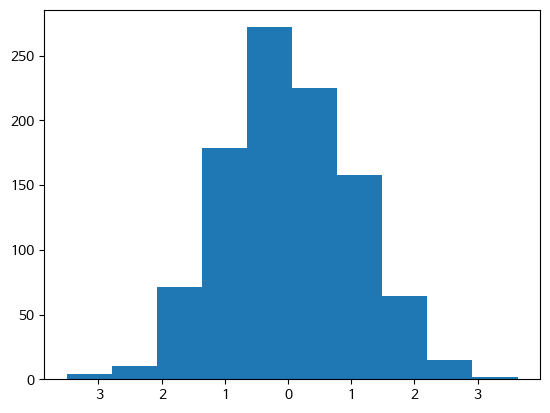

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family = 'NanumBarunGothic')
x = df_p['YEAR']
sum = df_p.groupby('YEAR').sum()
y = df_p.groupby('YEAR')[]
plt.plot(x, y, marker='o')